# Name - Priyesh Raj

# Objective - To predict the optimum number of clusters in Iris dataset
(Prediction Using Unsupervised ML)

In [4]:
# Importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
sns.set()
%matplotlib inline

In [46]:
# loading the iris dataset
data = datasets.load_iris()
data_df = pd.DataFrame(data.data,columns = data.feature_names)
data_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


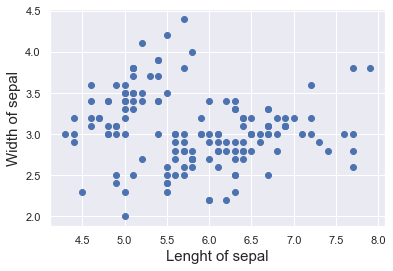

In [10]:
# Create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(data_df['sepal length (cm)'],data_df['sepal width (cm)'])
plt.xlabel('Lenght of sepal',fontsize = 15)
plt.ylabel('Width of sepal',fontsize = 15)
plt.show()

# Clustering(unscaled_data)

In [11]:
# Copying the dataset
x = data_df.copy()
# Let's try a 2 cluster solution
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [26]:
# adding cluster column to copy dataset
clusters = data_df.copy()
clusters['clusters'] = kmeans.fit_predict(x)
clusters.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


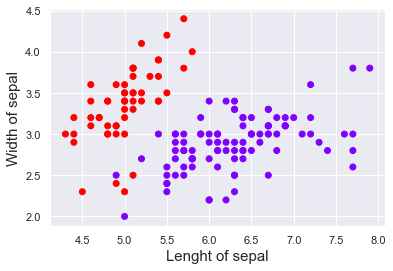

In [27]:
# Creating a scatterplot for the corresponding two features with clusters
plt.scatter(data_df['sepal length (cm)'],data_df['sepal width (cm)'],c = clusters['clusters'],cmap = 'rainbow')
plt.xlabel('Lenght of sepal',fontsize = 15)
plt.ylabel('Width of sepal',fontsize = 15)
plt.show()

Now let's try this again with the scaled data.


# Clustering(Scaled_Data)

In [18]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(data_df)
x_scaled
# Its in the form of array

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [24]:
# Fitting the data
kmeans_scaled = KMeans(2)
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=2)

In [39]:
# adding cluster column to copy dataset
cluster_scaled = data_df.copy()
cluster_scaled['Cluster_scaled'] = kmeans_scaled.fit_predict(x_scaled)
cluster_scaled


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster_scaled
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


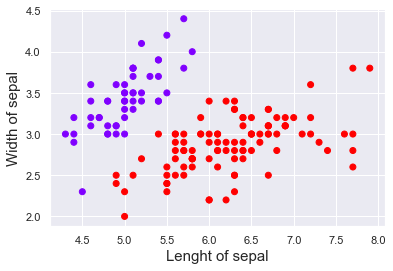

In [41]:
# Creating a scatterplot for the scaled data with clusters
plt.scatter(data_df['sepal length (cm)'],data_df['sepal width (cm)'],c = cluster_scaled['Cluster_scaled'],cmap = 'rainbow')
plt.xlabel('Lenght of sepal',fontsize = 15)
plt.ylabel('Width of sepal',fontsize = 15)
plt.show()

Looks like the two solutions are identical. That is because the original features have very similar scales to start with!

# Elbow Method

In [48]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0,
 222.36170496502302,
 139.82049635974974,
 114.30449485021943,
 90.80728315078541,
 81.50983962135962,
 70.68226933956178,
 62.86610173129559,
 55.31115522614981,
 47.25298494338766]

Text(0, 0.5, 'Within-cluster Sum of Squares')

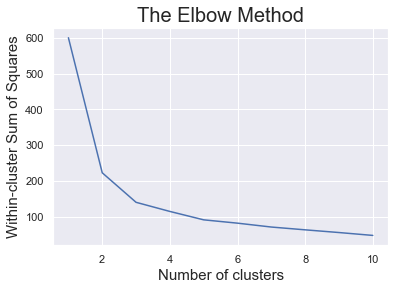

In [51]:
# Plotting no of clusters vs WCSS
no_of_clusters = range(1,11)
plt.plot(no_of_clusters,wcss)
plt.title('The Elbow Method',fontsize = 20)
plt.xlabel('Number of clusters',fontsize = 15)
plt.ylabel('Within-cluster Sum of Squares',fontsize = 15)

It seems like 2 or 3-cluster solutions are the best.
We have already plotted for 2 - cluster.
Let's see a 3-cluster solution

In [55]:
kmeans_3 = KMeans(3)
kmeans.fit(x_scaled)
cluster_3 = x.copy()
cluster_3['Clusters']=kmeans_3.fit_predict(x_scaled)

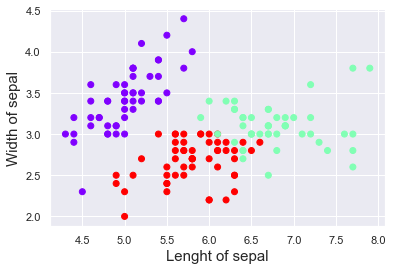

In [56]:
# Creating a scatterplot for the scaled data with 3-clusters
plt.scatter(cluster_3['sepal length (cm)'],cluster_3['sepal width (cm)'],c = cluster_3['Clusters'],cmap = 'rainbow')
plt.xlabel('Lenght of sepal',fontsize = 15)
plt.ylabel('Width of sepal',fontsize = 15)
plt.show()

# Comparing our solution with the original Iris Dataset

In [61]:
# data url - https://bit.ly/3kXTdox
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


This time we have species with us.Let's look at the number of species

In [62]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

There are a total of 3 different species.Thus,the 3-cluster solution is good.

Now let's try to visualize graphically

In [64]:
# We use the map function to change any 'yes' values to 1 and 'no'values to 0. 
iris['Species'] = iris['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1 , 'Iris-virginica':2})
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


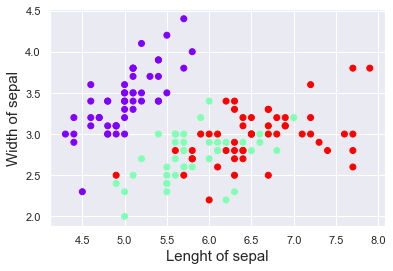

Plot with legend



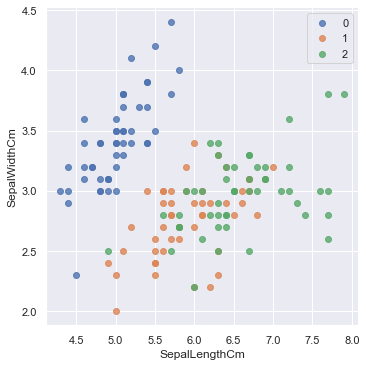

In [88]:
plt.scatter(iris['SepalLengthCm'],iris['SepalWidthCm'],c = iris['Species'],cmap = 'rainbow')
plt.xlabel('Lenght of sepal',fontsize = 15)
plt.ylabel('Width of sepal',fontsize = 15)
plt.show()
print('Plot with legend\n')
sns.lmplot(data=iris, x='SepalLengthCm', y='SepalWidthCm',hue='Species',
                   fit_reg=False, legend=False)
plt.legend()
plt.show()

Looks like the the clustering solution is much more twisted than what we found before.
Let's try plotting petal length and petal width

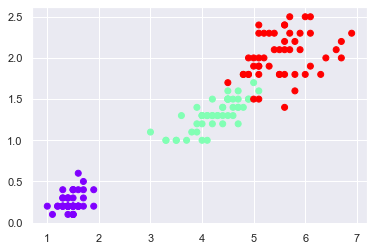

In [68]:
plt.scatter(iris['PetalLengthCm'],iris['PetalWidthCm'],c = iris['Species'],cmap = 'rainbow')
plt.show()

From the above graph it seems that the species are differentiated on the basis of petals and not sepals

# Our clustering solution

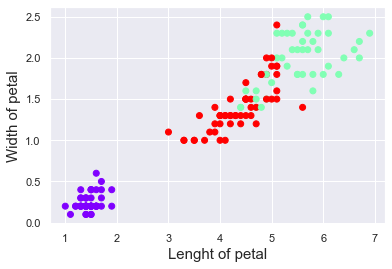

In [69]:
plt.scatter(cluster_3['petal length (cm)'],cluster_3['petal width (cm)'],c = cluster_3['Clusters'],cmap = 'rainbow')
plt.xlabel('Lenght of petal',fontsize = 15)
plt.ylabel('Width of petal',fontsize = 15)
plt.show()

# Conclusion

The total number of clusters is 3.
The elbow method also indicated that.


Compairing with the Original Iris dataset confirms that it has 3-species(3-clusters) and the main difference between them is Petals.